# <b>Outliers</b>
><li>An outlier is a data point that differs significantly from other observations.</li><br>
><li>Outliers are the most extreme observations.</li><br>
><li>We will use the famous tips dataset and will focus on the Continuous Feature "tip".</li><br>
><li>Once the outliers are detected , they can either be separately handled or removed from dataset.</li>


<b>Outliers can be present for any of the following reasons:-</b>
><li>Data Entry Errors</li><br>
><li>Measurement Error</li><br>
><li>Experimental Error</li><br>
><li>Sampling error</li><br>
><li>Natural Outlier</li>

# The <b>68–95–99.7</b> rule,

><li>In a normal distribution, 68.27% , 95.45% and 99.73% of the values lie within one, two and three standard deviations of the mean, respectively.</li><br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Empirical_rule_histogram.svg/450px-Empirical_rule_histogram.svg.png"/><br>
><li>The Two standard deviations from either side of the mean is approximately a 95% confidence interval.</li><br>
><li>The observations falling away from two standard deviations have a confidence interval of less than 5% of falling into the distribution.</li> Therefore, <br>

>><li>The observations falling away from two standard deviations from either side of the mean are extreme points and can be taken as outliers, i.e.<br>
>>><li>observations < ( μ( data ) - 2 * σ( data )) <br> <br>and 
>>><li> observations > ( μ( data ) + 2 * σ( data ))

<b>Loading the Data

In [136]:
import seaborn as sns
import numpy as np
import pandas as pd
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
sns.set()
tips = sns.load_dataset("tips")

In [165]:
tips["tip"]=tips["tip"].apply(lambda x:math.ceil(x))
tips["tip"].head()

0    2
1    2
2    4
3    4
4    4
Name: tip, dtype: int64

>The Feature "tip" was of type "float".<br><br>So,to make things easy convert the values to int. 

Let us calculate the mean,standard deviation & two standard deviation of the data:-

In [140]:
tip_mean=tips["tip"].mean()
tip_std=tips["tip"].std()
mini_outlier=tip_mean-2*tip_std
maxi_outlier=tip_mean+2*tip_std
print("Values less than {:.2f}".format(mini_outlier),"and more than {:.2f} can be used as outliers.".format(maxi_outlier))

Values less than 0.55 and more than 6.17 can be used as outliers.


Let us Check if outliers are present or not:-

In [202]:
print(sum((tips["tip"]<mini_outlier) | (tips["tip"]>maxi_outlier)))

7


>Clearly Outliers are present.

# Visualization

<b>Pie Plot</b>
><li>It can be used on categorical Features.</li><br>
><li>The very less frequent values can be taken as outliers and can either be separately handled / removed from the dataset.</li>

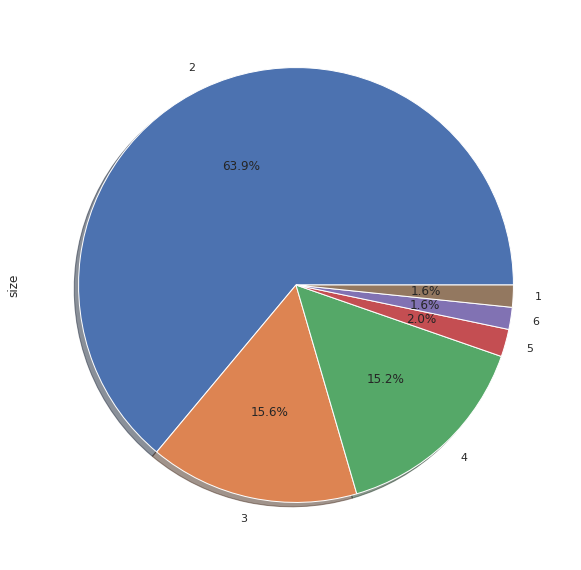

In [215]:
val_count=tips['size'].value_counts()
length=len(val_count)
val_count.plot.pie(explode=[0.0] * length,autopct='%1.1f%%',shadow=True,figsize=(50,10))
plt.show()

<b>CountPlot</b>
><li>It is another plot that can be used on categorical Features.</li><br>
><li>The very less frequent values can be taken as outliers and can either be separately handled / removed from the dataset.</li>

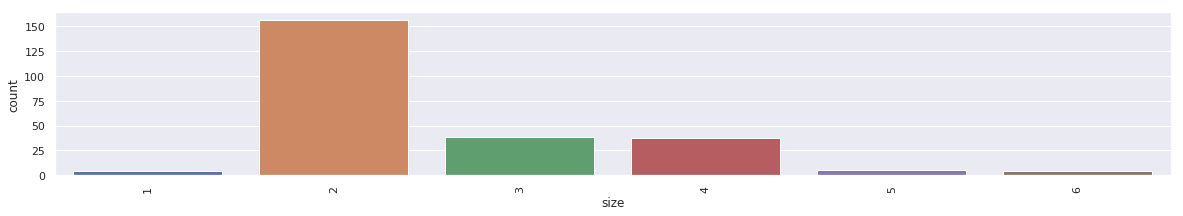

In [216]:
f, ax = plt.subplots(figsize=(20, 3))
sns.countplot(x="size",data=tips)
plt.xticks(rotation=90)
plt.show()

<b>Distplot</b>
>It can be used for Continuous Feature.

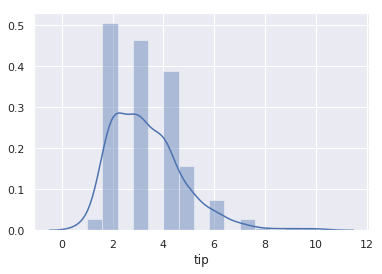

In [226]:
x=tips["tip"];
ax = sns.distplot(x,hist=True)
plt.show()

>Clearly there are points which are father away from the mean.

<b>CatPlot</b>
>The Outliers can be visualized w.r.t the Categorical(Target) Feature also.

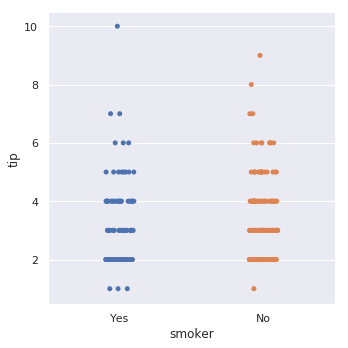

In [151]:
sns.catplot(x="smoker", y="tip", data=tips);
plt.show()

>There are more extreme points in "Yes" class than "No" class. 

<b>BoxPlot</b><br>
><li>A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. </li><br>
><li>The five-number summary is the minimum, first quartile, median, third quartile, and maximum.</li><br>
><li>The line inside the box that divides the box into two is Second Quartile.i.e., median.</li><br>
><li>The box below the median starts from First Quartile.</li><br>
><li>The box above the median ends at Third Quartile.</li><br>
><li>Whiskers are the two vertical lines outside the box.</li><br>
><li>Whiskers cut through two horizontal lines:-</li><br>
>><li>The lowest horizontal line represent (Q1-1.5*IQR)</li><br>
>><li>The topmost horizontal line represent (Q3+1.5*IQR)</li>
<br>

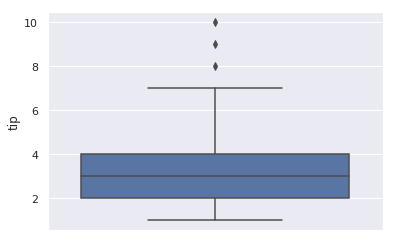

In [228]:
sns.boxplot(y="tip",data=tips);
plt.show()

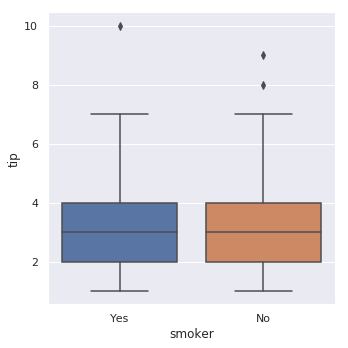

In [168]:
sns.catplot(x="smoker",y="tip", kind="box", data=tips);
plt.show()

>BoxPlot to detect outliers w.r.t the Categorical(Target) Feature.

<b>Violin Plot</b><br>
>Violin plots are similar to box plots, except that they also show the probability density of the data at different values,

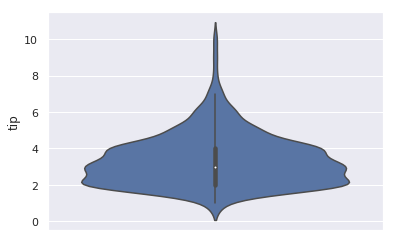

In [218]:
sns.violinplot(y="tip", kind="violin", split=True, data=tips);
plt.show()

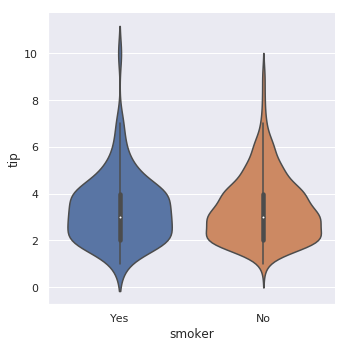

In [169]:
sns.catplot(x="smoker", y="tip", kind="violin", split=True, data=tips);
plt.show()

>ViolinPlot to detect outliers w.r.t the Categorical(Target) Feature.

<h2>Z-Score</h2>
><li>A z-score describes the position of a raw score in terms of its distance from the mean, when measured in standard deviation units.<br>
><li>Z-scores may be positive or negative.<br>
>><li>A positive value indicating the score is above the mean. <br>   
>><li>A negative score indicating it is below the mean.<br>
    
><li>A Z-score is 0, it indicates that the data point's score is identical to the mean score.<br>
><li>A Z-score of 1.0 would indicate a value that is one standard deviation from the mean.<br> 
><li>The formula for calculating a z-score is:-</li><br>
   &emsp;&emsp;&emsp;&emsp; z = (x-μ)/σ, where<br>
>>  
<li>x is the raw score, <br>
<li>μ is the population mean, and<br> 
<li>σ is the population standard deviation.

In [171]:
z = np.abs(stats.zscore(tips["tip"]))
print(tips.shape)
threshold = 2
np.where(z >threshold)

(244, 7)


(array([ 23,  59, 141, 170, 183, 212, 214]),)

>These are the indices of observations which represent the outliers.

In [190]:
tips.loc[np.where(z > threshold)[0]]["tip"]

23      8
59      7
141     7
170    10
183     7
212     9
214     7
Name: tip, dtype: int64

>All these observations have values which are more than two standard deviation away from mean.

<b>Removal of Outliers using Z-Score</b>

In [174]:
print(tips["tip"].shape)
tips["tip"].drop(np.where(z > threshold)[0]).shape

(244,)


(237,)

>7 outliers have been removed from our dataset. 

<h2>Interquartile Range</h2><br>

><li>It is used to measure how data points are spread out from the mean of the data set.</li>
    
>><li>large => the more spread out the data points away from the mean.</li><br>

>><li>small => the data points are more assembled around the mean. </li>

><li>The First quartile,(Q1) is defined as the middle number between the smallest number and the median of the data set.</li>  <br>
><li>The Second quartile (Q2) is the median of a data set and 50% of the data lies below this point.</li> <br>
><li>The Third quartile,(Q3) is the middle value between the median and the highest value of the data set.</li><br>
><li><b>I.Q.R.= Q3 - Q1</li>

In [195]:
Q1 = tips["tip"].quantile(0.25)
Q2 = tips["tip"].quantile(0.50)
Q3 = tips["tip"].quantile(0.75)
IQR=Q3-Q1
print("First Quartile is {}, Second Quartile is {} and Third Quartile is {}".format(Q1,Q2,Q3))
print("Inter Quartile Range is {}".format(IQR))

First Quartile is 2.0, Second Quartile is 3.0 and Third Quartile is 4.0
Inter Quartile Range is 2.0


In [200]:
tips["tip"].describe()

count    244.000000
mean       3.360656
std        1.405841
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       10.000000
Name: tip, dtype: float64

>The "describe" function can be used to verify this :-
>><li>The 25% of the "tip" values are less than or equal to 2. i.e. Q1=2.
>><li>The 50% of the "tip" values are less than or equal to 3. i.e. Q2=3.
>><li>The 75% of the "tip" values are less than or equal to 4. i.e. Q3=4.

In [222]:
tips[(tips["tip"]<(Q1 - 1 * IQR)) | (tips["tip"]>(Q3 + 1 * IQR))]["tip"]

23      8
59      7
141     7
170    10
183     7
212     9
214     7
Name: tip, dtype: int64

<b>Removal of Outliers using IQR</b>

In [224]:
print(tips["tip"].shape)
tips[(tips["tip"]>(Q1 - 1.5 * IQR)) & (tips["tip"]<(Q3 + 1.5 * IQR))]["tip"].shape

(244,)


(237,)

>7 outliers have been removed from our dataset. 

Specify the quantiles directly into the below equation.

In [ ]:
tips[tips["tip"].between(tips["tip"].quantile(.25), tips["tip"].quantile(.75))]

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;END!